## 2. Components of `earthkit-plots`

In the previous section we learned how to plot data with the `quickplot` and `quickmap` modules, which use pre-built templates to make it possible to produce detailed visualisations in a single line of code.

However, we very often actually need to build a chart from the ground up. This section explores the core components of earthkit-plots visualisations, and how you can build your own plots from their constituent components.

### Subplots and Maps

The two most common types of plots that you will generate with earthkit-plots are the `Subplot` and the `Map`. These are the individual axes on which each plot will be visualised.

You may already be familiar with subplots from *matplotlib*. The concept is similar here, except that you do not need to define an overarching figure on which to put your subplots - if you're only producing a sinlge set of axes, you can start directly from the `Subplot` class.

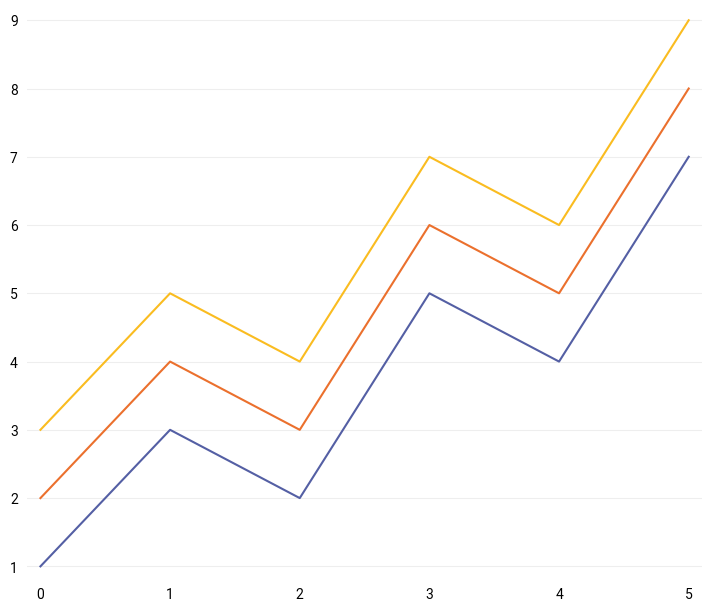

In [1]:
import earthkit.plots

subplot = earthkit.plots.Subplot()
subplot.line([1, 3, 2, 5, 4, 7])
subplot.line([i+1 for i in [1, 3, 2, 5, 4, 7]])
subplot.line([i+2 for i in [1, 3, 2, 5, 4, 7]])

subplot.show()

A `Subplot` is designed for plotting data on cartesian coordinates, whereas the `Map` is a special type of subplot specifically designed for plotting data using geospatial coordinates (e.g. latitude and longitude).

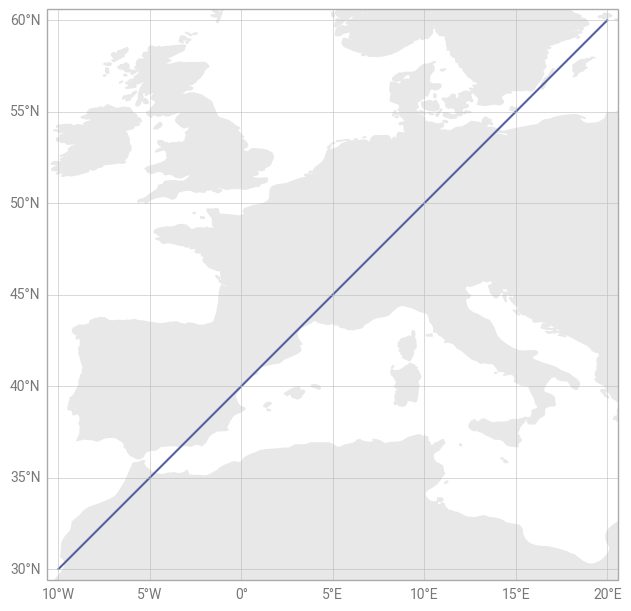

In [2]:
subplot = earthkit.plots.Map()
subplot.line(
    x=[-10, -5, 0, 5, 10, 15, 20],
    y=[30, 35, 40, 45, 50, 55, 60],
)

subplot.land()
subplot.gridlines()

subplot.show()

### Figures

A `Figure` in earthkit-plots represents the overall "canvas" onto which everything is plotted. When instantiating a figure, you can pass the number of rows and columns of subplots that you would like to make available for plotting.

Much like in matplotlib, adding subplots to a figure is achieved with the `add_subplot()` method. You can pass this the specific row and column where you would like to place the subplot - but if you omit this information, earthkit-plots will place the subplot in the "next" available row/column position (moving left-to-right, top-to-bottom).

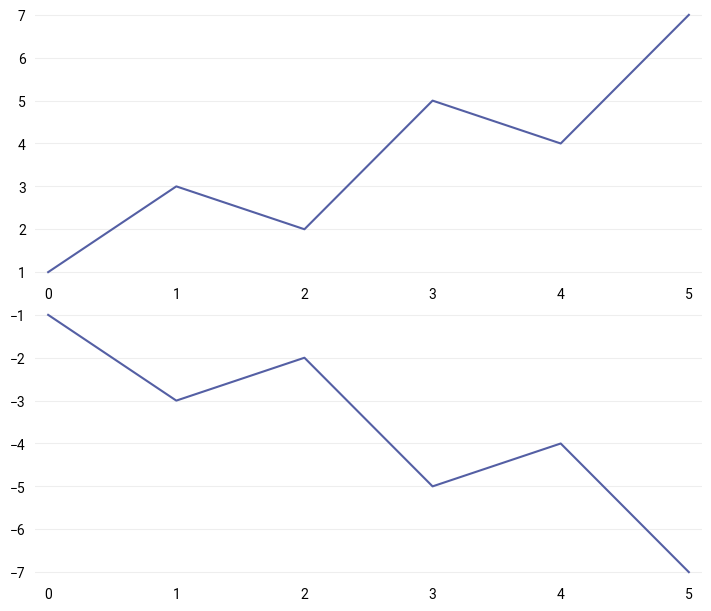

In [3]:
figure = earthkit.plots.Figure(rows=2, columns=1)

top_plot = figure.add_subplot()
top_plot.line([1, 3, 2, 5, 4, 7])

bottom_plot = figure.add_subplot()
bottom_plot.line([-1, -3, -2, -5, -4, -7])

figure.show()

You can also add maps to a figure with the similar `add_map()` method. This can take additional arguments, such as the domain and coordinate reference system to use for the map (which will be explored later in this user guide).

A `Figure` also provides a convenient way of applying the same method to *all* subplots that it contains, without the need to loop over them. For example, we can produce multiple maps and add coastlines to all of them at once by calling `figure.coastlines()`.

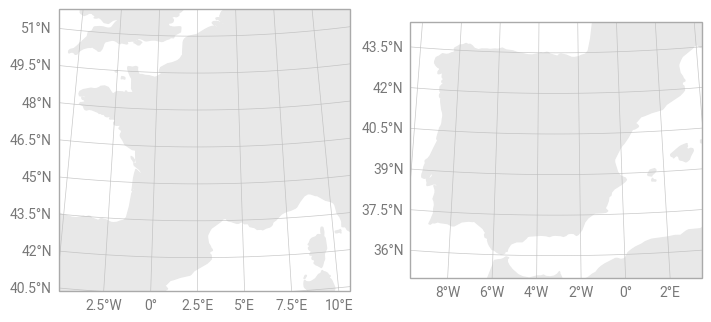

In [4]:
figure = earthkit.plots.Figure(rows=1, columns=2)

figure.add_map(domain="France")
figure.add_map(domain="Spain")

figure.land()
figure.gridlines()

figure.show()